# 1. 앱 생태계 구조
Apple App Store의 앱 장르 분포 상위 10개 확인 결과
- 전제 앱 중 약 53.7%가 Games
- 그 외 장르의 분포는 500개 이하, Games 장르가 압도적으로 많다
- 엔터테인먼트, 교육, 사진·영상 순


In [13]:
df['prime_genre'].value_counts().head(10)


prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Name: count, dtype: int64

In [14]:
# 장르별 비율 보기
genre_ratio = df['prime_genre'].value_counts(normalize=True).head(10)
print(genre_ratio)


prime_genre
Games                0.536612
Entertainment        0.074337
Education            0.062943
Photo & Video        0.048492
Utilities            0.034459
Health & Fitness     0.025010
Productivity         0.024733
Social Networking    0.023204
Lifestyle            0.020008
Music                0.019175
Name: proportion, dtype: float64


Matplotlib is building the font cache; this may take a moment.


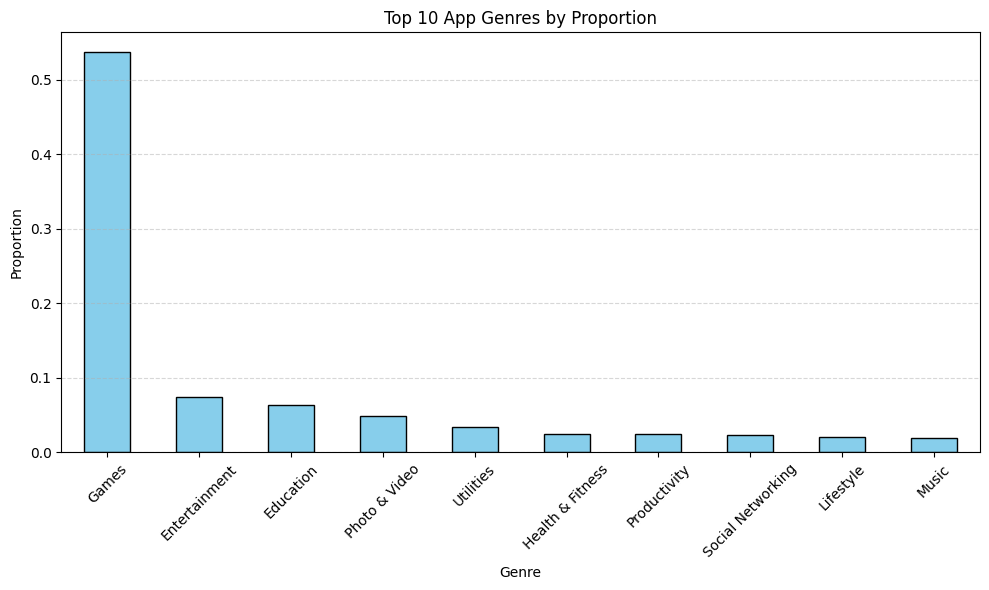

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("data/data/AppleStore.csv")

# 장르별 앱 개수 비율 계산 (상위 10개)
genre_ratio = df['prime_genre'].value_counts(normalize=True).head(10)

# 시각화
plt.figure(figsize=(10, 6))
genre_ratio.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 App Genres by Proportion')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


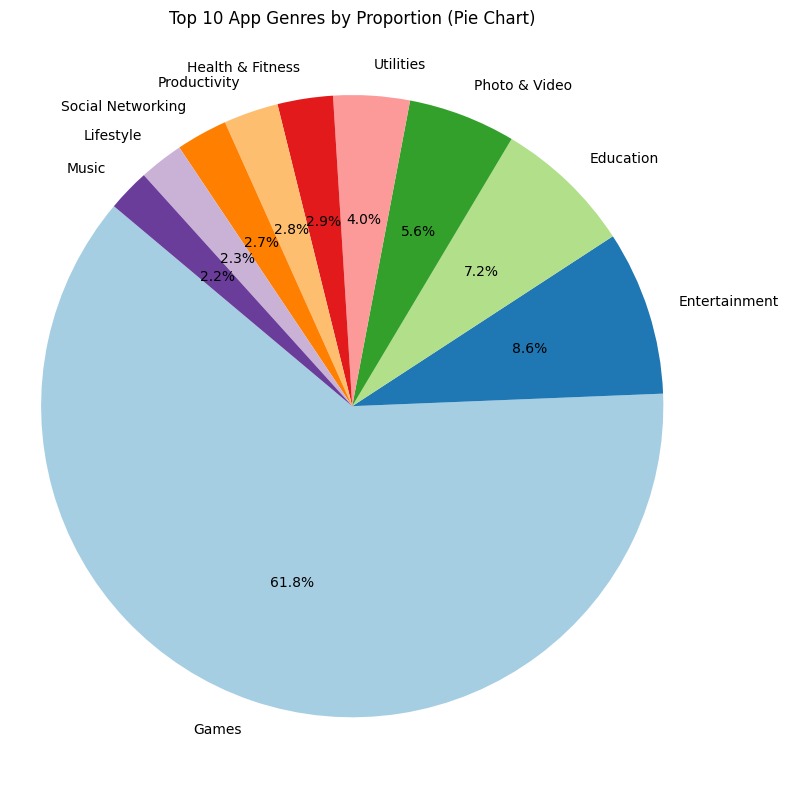

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("data/data/AppleStore.csv")

# 장르별 앱 개수 비율 계산 (상위 10개)
genre_ratio = df['prime_genre'].value_counts(normalize=True).head(10)

# 🎨 원형 그래프 시각화
plt.figure(figsize=(8, 8))
plt.pie(genre_ratio, labels=genre_ratio.index, autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.Paired.colors)
plt.title('Top 10 App Genres by Proportion (Pie Chart)')
plt.axis('equal')  # 원형을 동그랗게 유지
plt.tight_layout()
plt.show()


## 2. 무료 앱과 유료 앱의 비율

- 전체 앱 중 무료 앱은 약 56.4%
- 예상보다 유료 앱도 많은 편 (약 43.6%)

In [23]:
df['is_free'] = df['price'] == 0
df['is_free'].value_counts(normalize=True)


is_free
True     0.563568
False    0.436432
Name: proportion, dtype: float64

# 3. 평점 가장 높은 앱 Top 5
- 평점 5.0인 앱들 중 상위 5개 행을 보여줌 + 평점 만점인 곳중 상위순 5개
- 앱 이름(tracj_name), 평점(user_rating), 리뷰 수(rating_count_tot), 장르(prime_genre)
- 이론적인 평가 만점
- 유의미;  Mini Metro, Wayfair - Shop Furniture, Home Decor, Daily Sales, Mystic Castle - the Simplest & Best RPG and Ad...



In [24]:
import pandas as pd

# CSV 파일 불러오기 
df = pd.read_csv("data/data/AppleStore.csv")  # 예: data/data/AppleStore.csv

# 평점(user_rating)이 가장 높은 앱 5개 추출
top5_rated = df.sort_values(by="user_rating", ascending=False).head(5)

# 결과 출력
print("📱 평점이 가장 높은 앱 TOP 5:")
print(top5_rated[["track_name", "user_rating", "rating_count_tot", "prime_genre"]])


📱 평점이 가장 높은 앱 TOP 5:
                                             track_name  user_rating  \
7196                       Escape the Sweet Shop Series          5.0   
6231                           激おこ!! はじめしゃちょー　なんなんですか!?          5.0   
2531                                         Mini Metro          5.0   
2530  Wayfair - Shop Furniture, Home Decor, Daily Sales          5.0   
4885  Mystic Castle - the Simplest & Best RPG and Ad...          5.0   

      rating_count_tot prime_genre  
7196                 3       Games  
6231                 1       Games  
2531              4064       Games  
2530             12578    Shopping  
4885               650       Games  


In [25]:
# 장르별 평균 평점 계산
genre_rating_avg = df.groupby("prime_genre")["user_rating"].mean()

# 높은 평점 기준 정렬 (내림차순)
genre_rating_avg_sorted = genre_rating_avg.sort_values(ascending=False)

# 상위 10개만 출력
genre_rating_avg_sorted.head(10)


prime_genre
Productivity        4.005618
Music               3.978261
Photo & Video       3.800860
Business            3.745614
Health & Fitness    3.700000
Games               3.685008
Weather             3.597222
Shopping            3.540984
Reference           3.453125
Travel              3.376543
Name: user_rating, dtype: float64